# Scatterplots

A scatterplot has numeric values on both axes. Create a scatterplot to investigate relationships between numeric variables in your dataset. Use the Cars93 dataset in the MASS library.

We will also compute linear models (linear regressions), do overplotting, and compute residuals.

In [1]:
# load the Cars93 dataset
library(MASS)

# use cr as an alias for the dataset
cr = Cars93

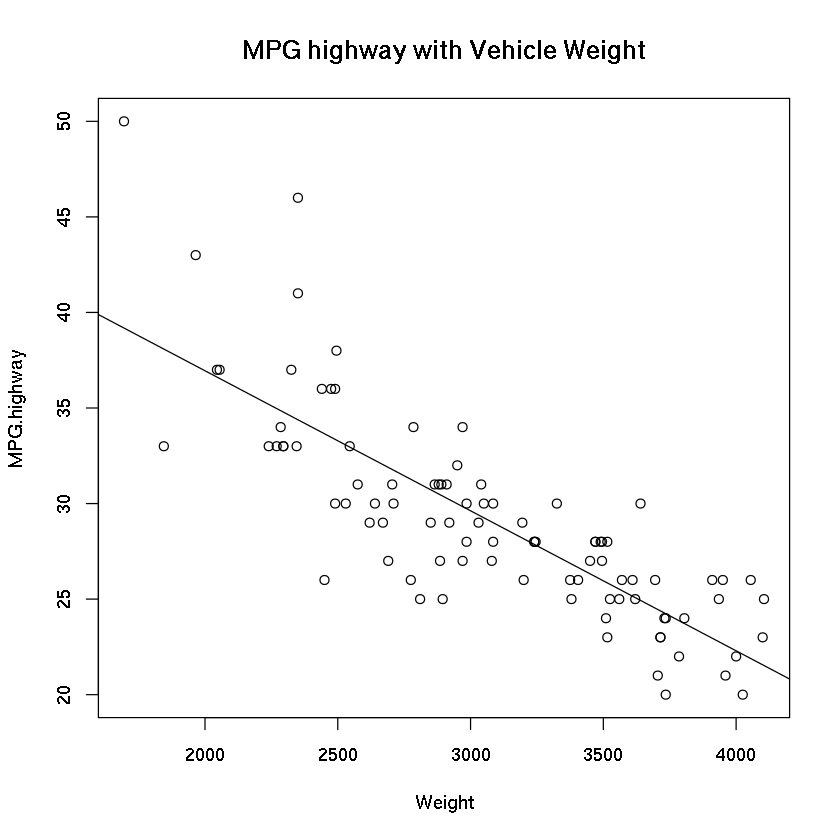

In [2]:
# ------- Plotting vehicle weight and highway MPG -------

# R automatically labels the axes from the column names. The dependent variable is listed first.

# MPG.highway~weight is: MPG.highway vs. weight
plot(formula=MPG.highway~Weight, 
     data=cr)

# Compute a linear model:
fit=lm(cr$MPG.highway~cr$Weight)

# Overlay it on the plot:
abline(fit)

# Add a title
title("MPG highway with Vehicle Weight")


# Using R's lm() function
A call to lm() provides a linear regression and information on goodness of fit. For more information, start here:
- https://www.statmethods.net/stats/regression.html
- https://stat.ethz.ch/R-manual/R-patched/library/stats/html/lm.html
- https://www.r-bloggers.com/r-tutorial-series-simple-linear-regression/

Scroll to the end of this notebook for diagnostic plots and an exploration of the returned data structure. 

## Side by side scatterplots

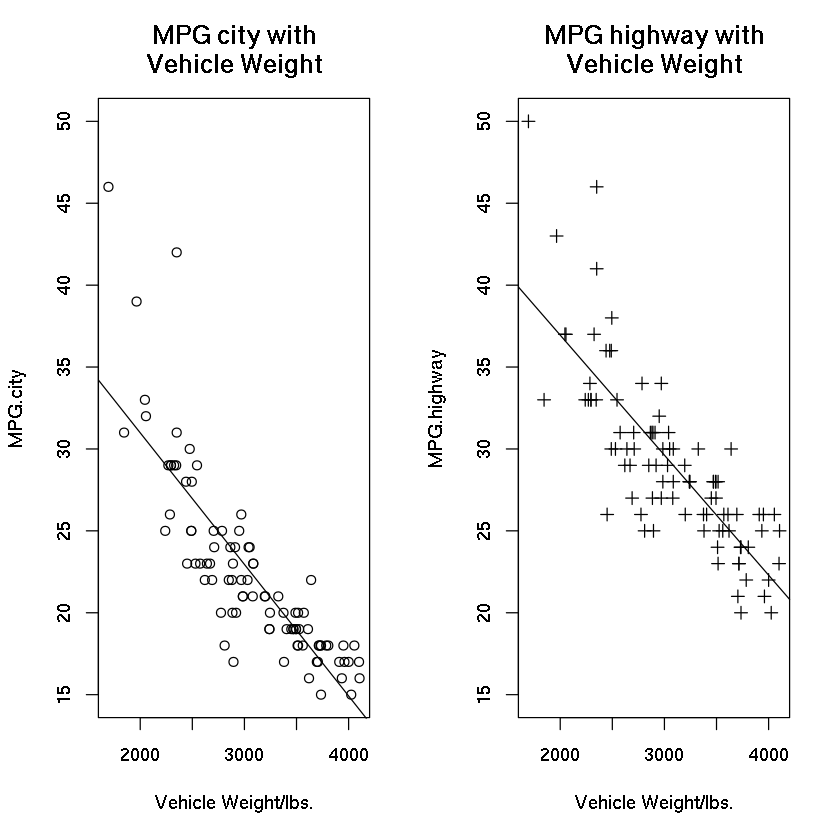

In [3]:
# ------- Vehicle weight and MPG: city and highway -------

# Two plots, side by side: mfrow: 1 row, 2 columns
par(mfrow=c(1,2))

yli=c(15,50) # enforce same y limits for both plots

# labels for x and y
yl = "MPG.city"
xl = "Vehicle Weight/lbs."

plot(formula=MPG.city~Weight, 
     data=cr, 
     xlab=xl, 
     ylab=yl,
     ylim=yli,
     pch=1)

fit=lm(cr$MPG.city~cr$Weight) 
abline(fit)
title("MPG city with\nVehicle Weight")


yl="MPG.highway"
plot(formula=MPG.highway~Weight, 
     data=cr, 
     xlab=xl, 
     ylab=yl,
     ylim=yli,
     pch=3)

fit=lm(cr$MPG.highway~cr$Weight)
abline(fit)
title("MPG highway with\nVehicle Weight")

par(mfrow=c(1,1), pch=1) # change back to default layout: 1 plot alone

## Overplotting

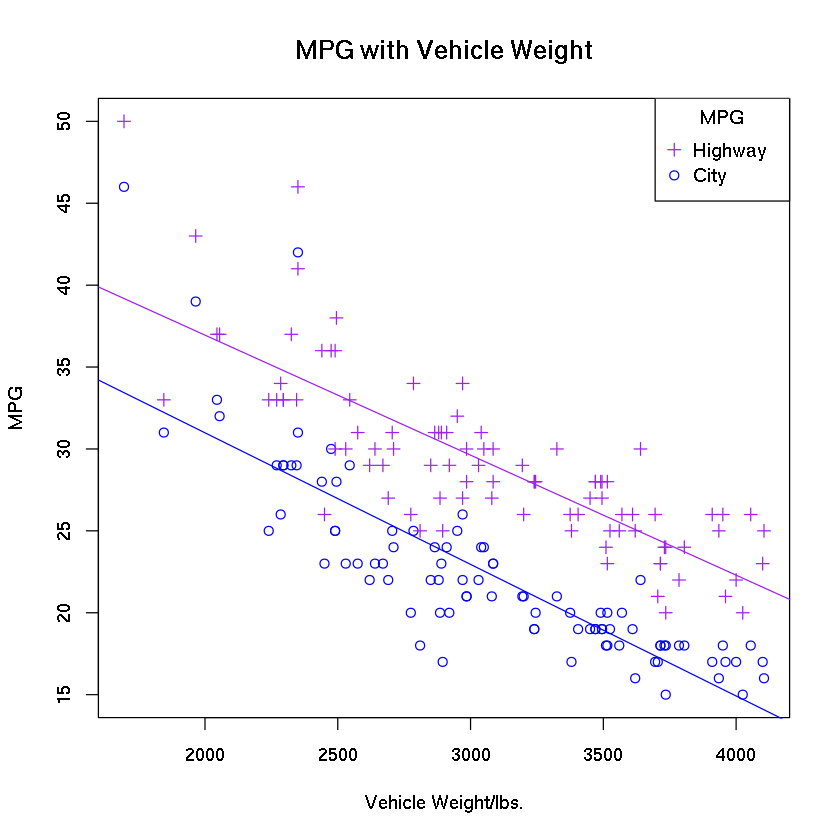

In [4]:
# --------- Overplotting on a single plot, using points() ----------

# weight and MPG 
# Color the points with "col", and give them a point type with "pch":

# labels for x and y axes:
yl = "MPG"
xl = "Vehicle Weight/lbs."

# plot MPG.city vs. Weight, in blue. 
# pch indicates point type:
plot(formula=MPG.city~Weight, 
     data=cr, 
     xlab=xl, 
     ylab=yl, 
     col="blue", # change color of points
     pch=1,      # specify point type
     ylim=yli)

# compute and draw linear fit forMPG.city vs. Weight:
fit=lm(cr$MPG.city~cr$Weight) 
abline(fit, col="blue")
title("MPG with Vehicle Weight")

# overplot MPG.highway vs. Weight, in purple. 
# pch indicates point type:
points(cr$Weight, 
       cr$MPG.highway, 
       col="purple", # change color of points
       pch=3,        # specify point type
       ylim=yli)

# compute and draw linear fit for MPG.highway vs. Weight:
fit2=lm(cr$MPG.highway~cr$Weight)
abline(fit2,col="purple")

# legend shows points and colors for each data type:
legend(x="topright",               
       title="MPG",         
       legend=c("Highway","City"), 
       pch=c(3,1),
       col=c("purple","blue"))          

par(mfrow=c(1,1), pch=1) # default plot appearance

## Computing residuals

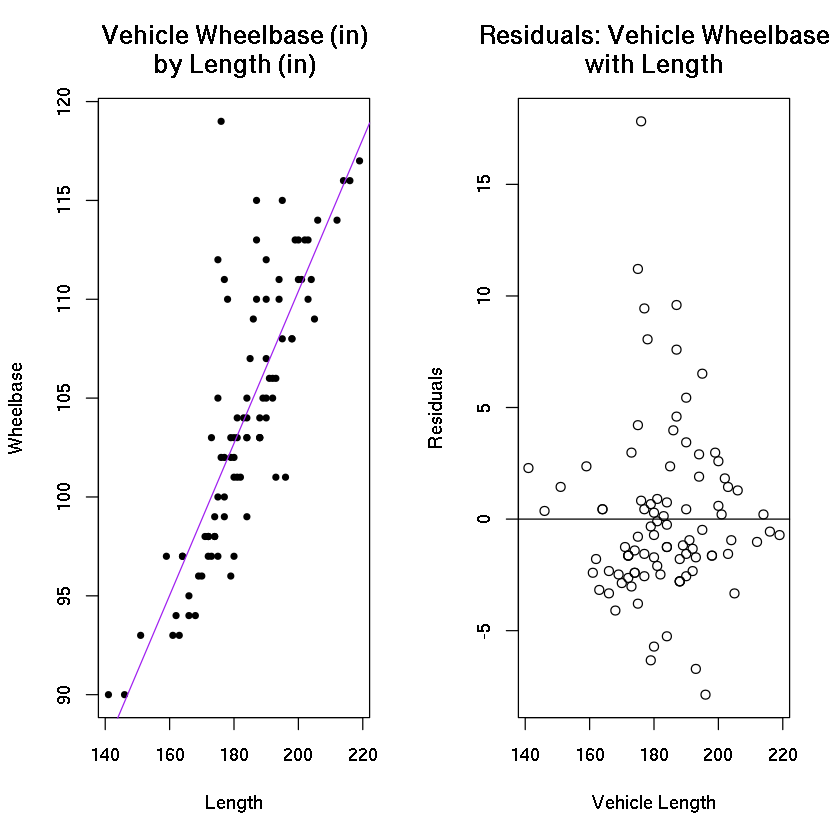

In [5]:
# ------------------ Wheelbase vs. Length scatter plot ------------------
 
par(mfrow=c(1,2)) 

# Wheelbase vs. Length, with regression line:
plot(Wheelbase~Length, data=cr, pch=20)
title("Vehicle Wheelbase (in)\nby Length (in)")
 
# create and plot the regression line:
fit2=lm(cr$Wheelbase~cr$Length)
abline(fit2,col="purple")

# ------------------ Wheelbase vs. Length Residuals ------------------
 
# Let's look at the residuals, the difference between the fitted
# values (expected by the linear model) and the real values.
 
#  What does the correllation between these two values tell you?
#  Call the cor() function to find out.

resid=resid(fit2)
plot(cr$Length, resid,
  ylab="Residuals",
  xlab="Vehicle Length",
  main="Residuals: Vehicle Wheelbase\nwith Length")
abline(0,0) # the horizon line

par(mfrow=c(1,1)) 

# Exploring the lm() function

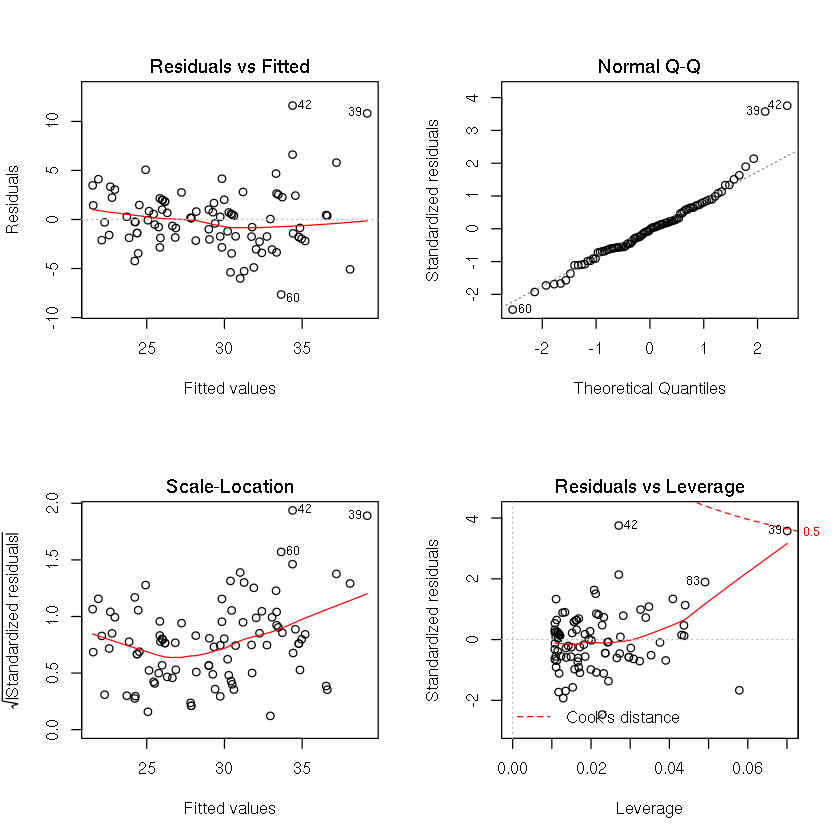

In [6]:
# here are the goodness of fit plots describing the fit=lm(cr$MPG.highway~cr$Weight)

# Compute a linear model:
fit=lm(cr$MPG.highway~cr$Weight)

par(mfrow=c(2,2))
plot(fit)
par(mfrow=c(1,1))


In [7]:
# Output of R's Linear Model or lm() function
print(fit)


Call:
lm(formula = cr$MPG.highway ~ cr$Weight)

Coefficients:
(Intercept)    cr$Weight  
  51.601365    -0.007327  



In [8]:
# summary() of the object returned by lm()
summary(fit)


Call:
lm(formula = cr$MPG.highway ~ cr$Weight)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6501 -1.8359 -0.0774  1.8235 11.6172 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 51.6013654  1.7355498   29.73   <2e-16 ***
cr$Weight   -0.0073271  0.0005548  -13.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.139 on 91 degrees of freedom
Multiple R-squared:  0.6572,	Adjusted R-squared:  0.6534 
F-statistic: 174.4 on 1 and 91 DF,  p-value: < 2.2e-16


In [37]:
# structure of the object returned by lm()
str(fit)

List of 12
 $ coefficients : Named num [1:2] 47.04835 -0.00803
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "cr$Weight"
 $ residuals    : Named num [1:93] -0.321 -0.453 0.061 -0.698 4.19 ...
  ..- attr(*, "names")= chr [1:93] "1" "2" "3" "4" ...
 $ effects      : Named num [1:93] -215.686 45.448 0.114 -0.643 4.261 ...
  ..- attr(*, "names")= chr [1:93] "(Intercept)" "cr$Weight" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:93] 25.3 18.5 19.9 19.7 17.8 ...
  ..- attr(*, "names")= chr [1:93] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:93, 1:2] -9.644 0.104 0.104 0.104 0.104 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:93] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "cr$Weight"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.1 1.09
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 91
 $ xl